In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [25]:
import re

REGEX_INRTO = "고객님은 \w\w님과 \d+년 \d+월 \d+일부터 총 \d+개의 메세지를 주고 받았습니다. \n+"
REGEX_NEWLINE = "\n"
REGEX_DATE = "\d\d\d\d년 \d+월 \d+일 [월화수목금토일]요일"
REGEX_TIME = "\w\w \d+:\d+, "
REGEX_NAME = "\w\w : "
REGEX_LAUGH = "ㅋ+"
REGEX_CRY = "[ㅠㅜ]+"
REGEX_URL = "http[s]?:\/\/(?:[a-zA-Z]|[0-9]|[$\-@\.&+:\/?=]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
REGEX_SEARCH = "샵검색 : #"


with open("messages.txt", "r") as f:
    message = f.read()
    
talk_user1 = result.count('태호 : ')
talk_user2 = result.count('지희 : ')
rate_talk_user1 = round(talk_user1/(talk_user1+talk_user2)*100, 2)
rate_talk_user2 = round(talk_user2/(talk_user1+talk_user2)*100, 2)

print("지금까지 누가 말을 더 많이 했냐면...\n", "태호:", rate_talk_user1, "%", "지희:", rate_talk_user2, "%")
    
REGEX = '|'.join(
    [REGEX_INRTO,
     REGEX_DATE,
     REGEX_TIME,
     REGEX_NAME,
     REGEX_LAUGH,
     REGEX_CRY,
     REGEX_URL,
     REGEX_SEARCH,])

result = re.sub(REGEX, '', message)

print(result)

# messages.txt
#고객님은 길순님과 2022년 10월 16일부터 총 24893개의 메세지를 주고 받았습니다. 
#
#
#
#
#2021년 12월 14일 화요일
#오전 11:01, 길동 : 안녕하세요~ 인천대학교 보드게임동아리
#마니또의 요정입니다🧞‍♀️
#2021 보인다 엠티 마니또 배정 결과를 발표합니다!
#오후 11:01, 길동 : 동영상
#오후 11:33, 길순 : 어마아앗
#오후 11:33, 길순 : 마니또인가요? ^^


지금까지 누가 말을 더 많이 했냐면...
 태호: 46.44 % 지희: 53.56 %
﻿
안녕하세요~ 인천대학교 보드게임동아리
마니또의 요정입니다🧞‍♀️
2021 보인다 엠티 마니또 배정 결과를 발표합니다!
동영상
어마아앗
마니또인가요? ^^
🧞‍♀️ 🧞‍♀️ 🧞‍♀️
혜미횐님 ^^
확인했습니다
저에게 너무 높은 분이
마니또인거 아닌가요?
랜덤 잘못 돌린 네이버를 탓하시면 됩니다
아이구~~
알겠습니다~
아무튼 즐거운 엠티 되세요~🧞‍♀️
고생이 많으십니다
네 ^^



지희 횐님
혹시 이번 회의는 참여 불가하신가요?
네네 불가능합니다
생일때문에 풀로 약속이 잡혀서요 다음 회의때 참여하겠습니다
아이구 
네 그러면 잘 다녀오세요!!
즐거운 연초 되시길~~~
네네! 새해 복 많이 받으세요~



지희 횐님
이모티콘 
무슨 일이신가요??
그거그거
총무 하실지말지
물어보려구
왔습니다
꽤 중요한 역할이라구 들었읍니다...
아주...
중요하지요...
마이깟...
이제또
그런자리에
지희횐님이
기가막히시지 않나...
우와...
횐님께서 그렇게 말해주시니
또 고민이 되는군요
ㅎㅎ...
총무가 어떤 일을 하는지
다시 한 번 확인해보려고 하는데
네
톡방에 뭐라구 검색하면 나올까요??
지난 12월 운영진 회의때
이야기를
제가 캡처해 드릴게요
잠시만 기다려주세요
와아!!!
사진
이 부분이고
인수인계는
지난번에 총무였던 명석이 형이 있으니까
명석이 형에게 물어보면 될거에요
제가 하겠읍니다
엄허나
이모티콘 
횐님...
강하시군요
쏘쓰윗~!!~!
강한친구?
강한친구
ㄹㅇ 

저도 도울거고
아직 저도 모르는 부분이 많아서
아쥬 든든하군여^^
같이 하면 될거같아요
^^
와아ㅏ~!~!
알겠습니다
그래도 혹시
다른 분들중에 하고 싶은 분이 있을순있으니까
물어보고 오겠습니당
네네!
이모티콘 
지희횐님
이모티콘 
돌고왔구요
지희 횐님이
총무
짝짞ㅉ깍
하겠습니다
와 와우와 와 와ㅏ~~~
이모티콘 
오늘 자정에
공지할거고
투표도 할 수 있으면
받을게용
포스터
어떤 투표요?!
아아
네네
열심히… 해보겠읍니

In [37]:
# from konlpy.tag import Okt
# okt = Okt()

ko_doc_noun = result.split()

from collections import Counter

count_noun = Counter(ko_doc_noun)

In [38]:
stopword_list = ['이모티콘', 'GIF', 'SELFIE', '사진', 'IMAGE', 'STICKER', 'VIDEO']

for word in count_noun:
    if len(word) == 1: # 한 글자 짜리도 없애는 게 더 예쁘게 나온다.
        stopword_list.append(word)
        
#stopword_list[-5:]

for stopword in stopword_list:
    if stopword in count_noun:
        count_noun.pop(stopword)

count_noun.most_common(50)

[('아잉', 783),
 ('태호~', 745),
 ('태호', 722),
 ('햄무는', 557),
 ('햄무', 477),
 ('누나', 467),
 ('근데', 416),
 ('우웅', 396),
 ('태호~~', 370),
 ('응응', 352),
 ('그러면', 260),
 ('태호는', 249),
 ('지금', 244),
 ('누나가', 220),
 ('사랑해', 213),
 ('그래서', 212),
 ('오늘', 211),
 ('햄무가', 209),
 ('나는', 202),
 ('응~', 196),
 ('누나~', 188),
 ('태호가', 186),
 ('이제', 180),
 ('그리고', 171),
 ('냅다', 164),
 ('내가', 163),
 ('하고', 160),
 ('그랭', 158),
 ('너무', 153),
 ('응웅', 145),
 ('햄무도', 143),
 ('마쟈', 141),
 ('아잉><', 131),
 ('가아', 130),
 ('그냥', 128),
 ('내일', 128),
 ('ㅇㅇ', 127),
 ('사실', 119),
 ('허억', 119),
 ('일단', 114),
 ('아니', 106),
 ('같이', 104),
 ('거야~', 103),
 ('와아', 102),
 ('아아', 101),
 ('누나는', 101),
 ('아무튼', 97),
 ('같아', 96),
 ('태호도', 94),
 ('바로', 93)]

In [39]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

#count_noun = dict(count_noun)
#type(dict(count_noun)) # generate_from_frequencies 는 딕셔너리 타입을 받는다.

dict

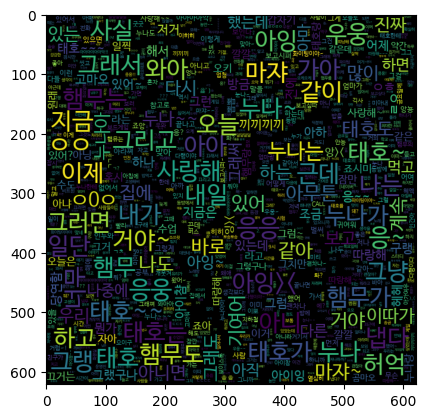

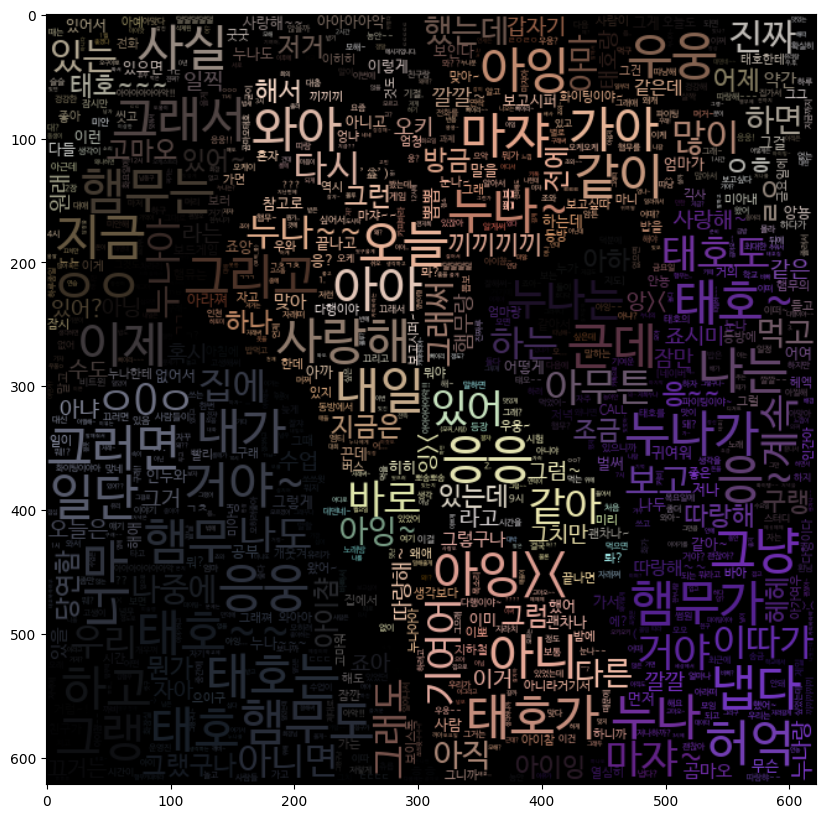

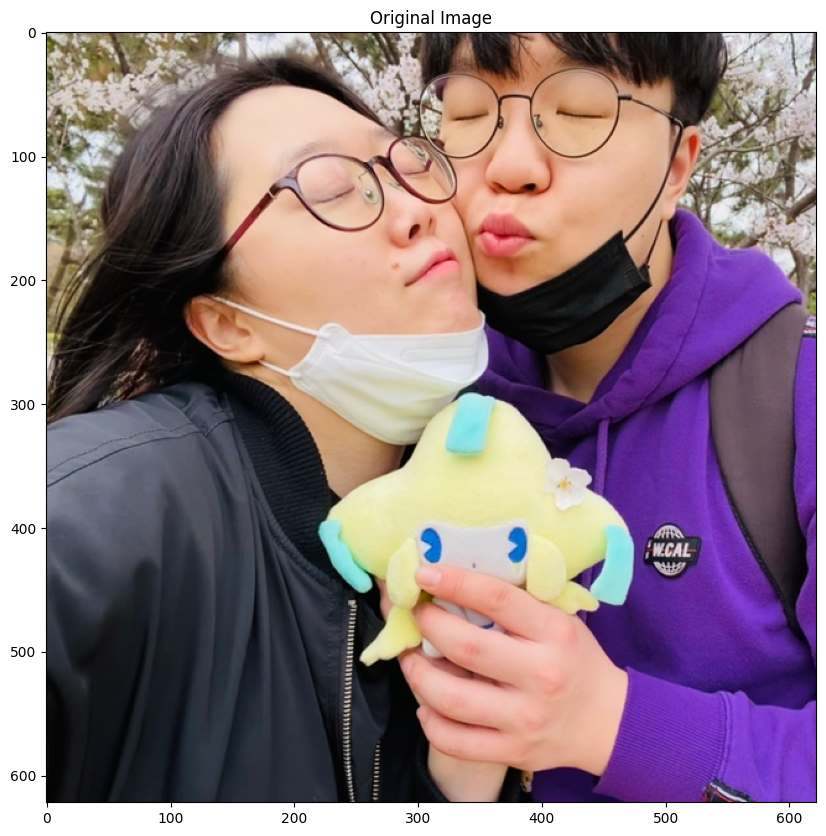

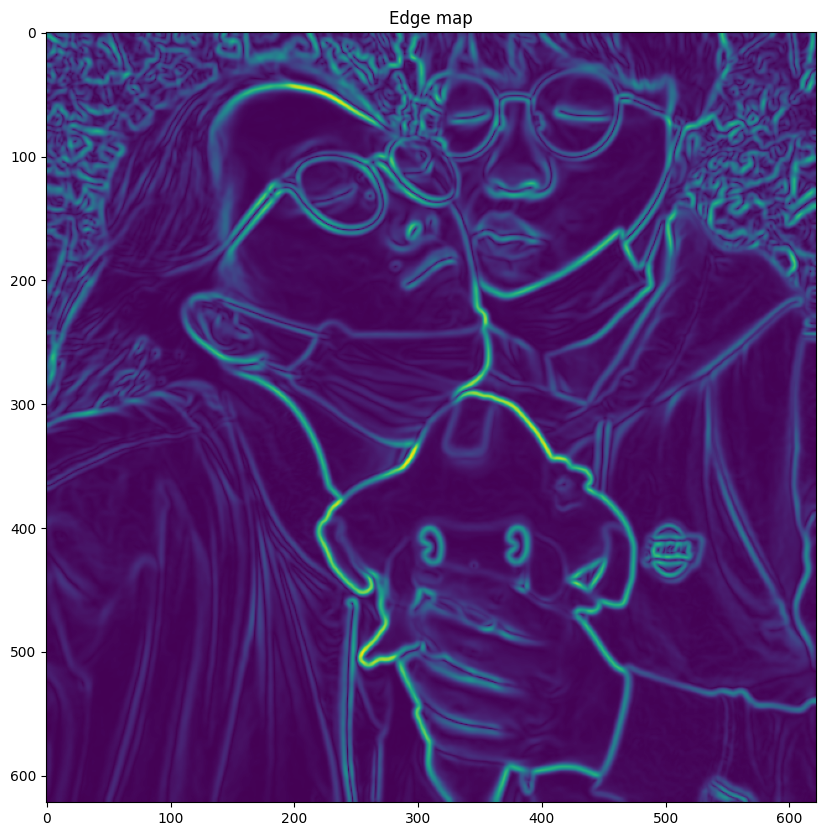

In [29]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
text = count_noun
#text = open(os.path.join(d, 'wiki_rainbow.txt'), encoding="utf-8").read()

# load image. This has been modified in gimp to be brighter and have more saturation.
oort_cloud_color = np.array(Image.open(os.path.join(d, "background.jpeg")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
oort_cloud_color = oort_cloud_color[::1, ::1]

# create mask  white is "masked out"
oort_cloud_mask = oort_cloud_color.copy()
oort_cloud_mask[oort_cloud_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(oort_cloud_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
oort_cloud_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000, font_path='/Library/Fonts/NanumBarunGothic.ttf', mask=oort_cloud_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate_from_frequencies(text)
#wc.generate(text)
plt.imshow(wc) # 이제 여기에 색을 입힐 거야!

# create coloring from image
image_colors = ImageColorGenerator(oort_cloud_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("oort_cloud.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(oort_cloud_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()

with open("oort_cloud.svg", "w") as text_file:
    text_file.write(wc.to_svg())